# Building a Classifier

**GOALS**

Build a Classifier that compares our classification methods in order to predict the individual who is tweeting: 


```
@iamcardib
@hillaryclinton
@_yiannopoulos
@thrashermag
@fwmagazine
```

In order to do this, we will review the process of retrieving a tweet and building a dataframe from the text of the tweet.  From here, your goal is to

1. Build a labeled dataframe containing at least 100 tweets from the five users.  
2. Explore the top 5 retweeted tweets from each user, make a visualization, discuss
3. Prepare the data for modeling using a `CountVectorizer` or `TfidfVectorizer`.  Remember to incorporate stop words and n-grams in your work.
4. Use a `LogisticRegression` classifier to determine the user.  How did it perform?
5. Use a `NaiveBayes` classifier to determine the user.  Did this do better?
6. Use a `DecisionTreeClassifier` to model the tweets.  How did this compare to the other two methods?
7. Build a table that compares the important information about these models.  
8. Suppose your task is to verify whether or not another account was actually Milo all along.  Which model would you use?  Why?  

In [2]:
import tweepy
import json
import pandas as pd
from tweepy import OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
api = tweepy.API(auth)

In [3]:
for status in tweepy.Cursor(api.home_timeline).items(10):
    # Process a single status
    print(status.text)

RT @ClausWilke: The ggplot2 extension gallery now lives at https://t.co/ZqlIHKQlZ5. Please update your bookmarks. The old link is no longer…
RT @AROD: So proud of Emme!! ❤️📖🙏
RT @camilla_cassidy: I didn't feel adequately represented by the 'programming' customisation option, so I made an #Rstats #RStudio design f…
RT @MollyBeck: BREAKING: Wisconsin Supreme Court strikes down Gov. Tony Evers' order to stay home in a 4-3 decision.
Last month, the Pentagon confirmed three Navy videos of UFOs were real. UFO hunter Luis Elizondo tells us what's ne… https://t.co/Z3eVn01o29
Was a bit nervous, made a perfect seared salmon fillet. Was afraid to overcook it, so it was a bit cool inside. I t… https://t.co/l5szFbad4l
RT @violadavis: Mood 🍷😂❤️ https://t.co/tZDeHw64i1
RT @foxfeather: Comet's first #dogshaming https://t.co/r2OL6zBQb5
RT @AlanStern: #PI_Daily Tomorrow: Meeting with @NewHorizons2015 students and postdocs (over the web) to discuss their new #Pluto and #Arro…
If you missed the quick talk

In [4]:
for status in tweepy.Cursor(api.home_timeline).items(1):
    # Process a single status
    print(status._json)

{'created_at': 'Thu May 14 01:30:21 +0000 2020', 'id': 1260744225584529408, 'id_str': '1260744225584529408', 'text': 'RT @ClausWilke: The ggplot2 extension gallery now lives at https://t.co/ZqlIHKQlZ5. Please update your bookmarks. The old link is no longer…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ClausWilke', 'name': 'Claus Wilke', 'id': 1679260675, 'id_str': '1679260675', 'indices': [3, 14]}], 'urls': [{'url': 'https://t.co/ZqlIHKQlZ5', 'expanded_url': 'https://exts.ggplot2.tidyverse.org/', 'display_url': 'exts.ggplot2.tidyverse.org', 'indices': [59, 82]}]}, 'source': '<a href="http://tapbots.com/tweetbot" rel="nofollow">Tweetbot for iΟS</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 69133574, 'id_str': '69133574', 'name': 'Hadley Wickham', 'screen_name': 'hadleywickham', 'location': 'Housto

In [ ]:
def process_or_store(tweet):
    print(json.dumps(tweet))

In [ ]:
for status in tweepy.Cursor(api.home_timeline).items(1):
    print(status)

In [34]:
for tweet in tweepy.Cursor(api.user_timeline, id = "ExploreMTBoS").items(1):
    print((tweet._json.keys()))

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


In [37]:
tweets = []
retweets = []
user = []
iden = []
geo = []
coords = []
place = []
favorite_count = []
favorited = []

for tweet in tweepy.Cursor(api.user_timeline, id = "ExploreMTBoS").items(5000):
    tweets.append(tweet._json['text'])
    retweets.append(tweet._json['retweet_count'])
    user.append(tweet._json['user']['screen_name'])
    iden.append(tweet._json['id'])
    geo.append(tweet._json['geo'])
    coords.append(tweet._json['coordinates'])
    place.append(tweet._json['place'])
    favorite_count.append(tweet._json['favorite_count'])
    favorited.append(tweet._json['favorited'])
df = pd.DataFrame({'tweets': tweets, 'retweets': retweets, 'user': user,
                  'identity': iden, 'geo': geo, 'coords': coords, 
                  'place': place, 'favorite_count': favorite_count,
                  'favorited': favorited})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 9 columns):
coords            0 non-null object
favorite_count    784 non-null int64
favorited         784 non-null bool
geo               0 non-null object
identity          784 non-null int64
place             0 non-null object
retweets          784 non-null int64
tweets            784 non-null object
user              784 non-null object
dtypes: bool(1), int64(3), object(5)
memory usage: 49.8+ KB


In [43]:
for tweet in tweepy.Cursor(api.user_timeline, id = "ExploreMTBoS").items(5):
    print(tweet.text)

RT @bowmanimal: has anyone used coding while teaching geometry? ( @dandersod ?)
RT @EulersNephew: Does anyone have some good reading about cultural competencies and culturally relevant pedagogy in math and science?  #iT…
RT @wmukluk: Are you interested in having discussions about equity and identity in the #mtbos in our classrooms, and in our lives?  Please…
RT @ridgway2math: Does anyone have any suggestions for extra challenging algebra books/supplemental resources for an 8th grade Algebra 1 cl…
If anyone out there is wondering what the #MTBoS hashtag thingie is, this might help! https://t.co/EV2rlQzE1W


In [ ]:
for tweet in tweepy.Cursor(api.user_timeline, id = "hillaryclinton").items(1):
    print(tweet._json['text'])

In [ ]:
for tweet in tweepy.Cursor(api.user_timeline, id = "hillaryclinton").items(1):
    print(json.dumps(tweet._json['text']))

In [ ]:
for tweet in tweepy.Cursor(api.user_timeline, id = "hillaryclinton").items(1):
    print(json.dumps(tweet._json))

In [ ]:
for tweet in tweepy.Cursor(api.user_timeline, id = "hillaryclinton").items(1):
    print((tweet._json.keys()))

In [ ]:
tweets = []
retweets = []
user = []
for tweet in tweepy.Cursor(api.user_timeline, id = "hillaryclinton").items(5000):
    tweets.append(tweet._json['text'])
    retweets.append(tweet._json['retweet_count'])
    user.append(tweet._json['user']['screen_name'])
df = pd.DataFrame({'tweets': tweets, 'retweets': retweets, 'user': user})

In [ ]:
tweets = []
retweets = []
user = []
for tweet in tweepy.Cursor(api.user_timeline, id = "iamcardib").items(5000):
    tweets.append(tweet._json['text'])
    retweets.append(tweet._json['retweet_count'])
    user.append(tweet._json['user']['screen_name'])
df2 = pd.DataFrame({'tweets': tweets, 'retweets': retweets, 'user': user})

In [ ]:
tweets = []
retweets = []
user = []
for tweet in tweepy.Cursor(api.user_timeline, id = "_yiannopoulos").items(5000):
    tweets.append(tweet._json['text'])
    retweets.append(tweet._json['retweet_count'])
    user.append(tweet._json['user']['screen_name'])
df3 = pd.DataFrame({'tweets': tweets, 'retweets': retweets, 'user': user})

In [ ]:
tweets = []
retweets = []
user = []
for tweet in tweepy.Cursor(api.user_timeline, id = "thrashermag").items(5000):
    tweets.append(tweet._json['text'])
    retweets.append(tweet._json['retweet_count'])
    user.append(tweet._json['user']['screen_name'])
df4 = pd.DataFrame({'tweets': tweets, 'retweets': retweets, 'user': user})

In [ ]:
df_combined = pd.concat([df, df2, df3, df4])

In [ ]:
df_combined.to_csv('tweets.csv')

In [1]:
import pandas as pd
df = pd.read_csv('tweets.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12764 entries, 0 to 12763
Data columns (total 4 columns):
Unnamed: 0    12764 non-null int64
retweets      12764 non-null int64
tweets        12764 non-null object
user          12764 non-null object
dtypes: int64(2), object(2)
memory usage: 399.0+ KB


In [3]:
def sort_tweets(df):
    return df.max()

In [4]:
groups = df.groupby('user')

In [5]:
df_combined[df_combined.user == '_yiannopoulos'].nlargest(1, 'retweets')

NameError: name 'df_combined' is not defined

In [6]:
idx = df.groupby(['user'])['retweets'].transform(max) == df['retweets']
pd.set_option('max_colwidth', 156)

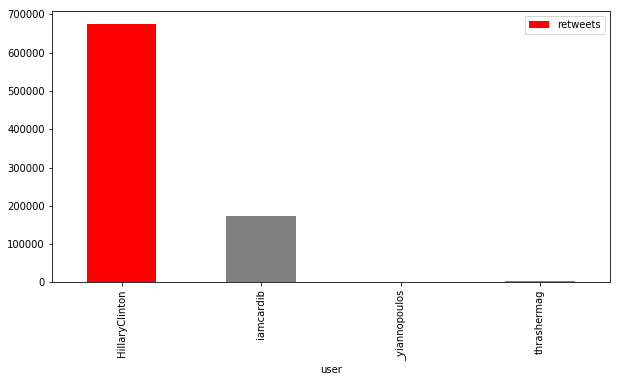

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df[idx].plot.bar('user', 'retweets', figsize = (10, 5), color = ['red', 'grey', 'grey', 'grey'])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 3), min_df = 10, max_df=0.5)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from textblob import TextBlob

In [13]:
sent = []
pol = []
for tweet in df.tweets:
    text = TextBlob(tweet)
    sent.append(text.sentiment[1])
    pol.append(text.polarity)

In [14]:
df['sentiment'] = sent
df['polarity'] = pol

In [15]:
df.head()

,Unnamed: 0,retweets,tweets,user,sentiment,polarity
0,0,15122,"As of today, there are 14 weeks until the midterm election, and they'll go by in a flash. Are your friends and fami… https://t.co/Y0hyt7tY8f",HillaryClinton,0.0,0.0
1,1,2152,Congrats to @IndivisibleTeam volunteers around the country for hosting and running 150+ events this weekend to reac… https://t.co/ZysitCZYgV,HillaryClinton,0.0,0.0
2,2,401,"RT @latinovictoryus: 🙌🏼 This is a humanitarian crisis being perpetrated by our own government. Thanks for raising awareness, @MarkRuffalo a…",HillaryClinton,0.6,0.4
3,3,1538,"Give them all a follow, a RT, or an email sign-up—you won't regret it. You can also sign up for updates from Onward… https://t.co/096y48ivCV",HillaryClinton,0.0,0.0
4,4,1619,"After Justice Kennedy announced his retirement from the Supreme Court, @WeDemandJustice leapt into action to launch… https://t.co/euxmp2qGGa",HillaryClinton,0.1,0.1


In [16]:
xtfidf = tfidf.fit_transform(df.tweets)

In [17]:
feats = tfidf.get_feature_names()

In [18]:
tfs = xtfidf.toarray()

In [19]:
vects = pd.DataFrame(tfs, columns=feats)

In [20]:
vects.shape

(12764, 2506)

In [21]:
df.shape

(12764, 6)

In [22]:
vects.columns[:5]

Index(['00', '000', '10', '100', '11'], dtype='object')

In [23]:
vects.head()

,00,000,10,100,11,12,13,13 angry,14,15,...,yesterday,yo,york,york times,young,young people,youtube,zach,zero,zion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514658,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree = DecisionTreeClassifier()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(vects, df.user)

In [27]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
tree.score(X_test, y_test)

0.816045126919461

In [29]:
type(X_test)

pandas.core.frame.DataFrame

In [30]:
tree.predict(X_test)

array(['_yiannopoulos', 'iamcardib', 'thrashermag', ..., '_yiannopoulos',
       'HillaryClinton', '_yiannopoulos'], dtype=object)

In [31]:
df.tweets[4]

'After Justice Kennedy announced his retirement from the Supreme Court, @WeDemandJustice leapt into action to launch… https://t.co/euxmp2qGGa'

In [32]:
tree.predict(tfidf.transform(df.tweets[[900]]))

array(['HillaryClinton'], dtype=object)

In [33]:
df.tweets[[5900]]

5900    I miss my babes😪We gotta work thoo😩💪🏾💪🏾💪🏾
Name: tweets, dtype: object

In [34]:
tree.predict(tfidf.transform(df.tweets[[5900]]))

array(['iamcardib'], dtype=object)

### To Do

- Write a function that takes in usernames and tweet number, and returns a `DataFrame` with the appropriate number of tweets, labeled user, tweet body, retweets, and geo location information.
- Explore top retweets
- Prepare for `sklearn`
- Classification Models

In [ ]:
users = ['iamcardib',
'hillaryclinton',
'yiannopoulos',
'thrashermag']